# Gerren Hunter

## Research question/interests

Originally, I wanted to create a machine-learning model to predict fights, but due to time constraints and an overestimation of my abilities, I will be answering the following questions instead. 

Q1.) How does the total amount of significant strikes to the head affect a fighter’s career? (In terms of securing future wins) 	

Q2.) What are the top 3 ways of finishing a fight, be it submission, tko, etc...

Q3.) Is there a correlation with the fighter's reach and the number of wins that they have? 


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_raw = pd.read_csv("../data/raw/raw_data.csv")

data_raw.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


# Milestone 3 

## Task 1: EDA 

First, let's start off by examing some general trends of the data

In [6]:
data_raw.shape

(6012, 144)

In [7]:
data_raw.describe()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,...,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.00000,4585.000000,...,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6008.000000,5606.000000,6010.000000,5840.000000,5949.000000
mean,0.247476,0.176818,0.453310,0.434290,0.292650,0.268742,0.478884,0.409276,0.15673,0.141306,...,0.306886,1.251331,1.297572,0.796241,0.069195,178.991788,183.562347,170.686356,29.293151,29.598252
std,0.378509,0.324633,0.130458,0.132618,0.273628,0.267178,0.724229,0.653826,0.34199,0.322623,...,0.619485,1.681376,1.859955,1.355801,0.273980,8.812985,10.585313,35.724626,4.063297,4.167755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,152.400000,152.400000,115.000000,18.000000,19.000000
25%,0.000000,0.000000,0.376489,0.351045,0.031250,0.033203,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,172.720000,177.800000,145.000000,26.000000,27.000000
50%,0.015625,0.000000,0.450000,0.427500,0.250000,0.200000,0.148468,0.098389,0.00000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,180.340000,182.880000,170.000000,29.000000,29.000000
75%,0.500000,0.250000,0.527500,0.510000,0.500000,0.422812,0.750000,0.531250,0.12500,0.125000,...,0.000000,2.000000,2.000000,1.000000,0.000000,185.420000,190.500000,185.000000,32.000000,32.000000
max,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,8.000000,7.000000,4.00000,3.000000,...,5.000000,10.000000,11.000000,13.000000,2.000000,210.820000,213.360000,345.000000,51.000000,47.000000


In [8]:
for col in data_raw.columns:
    print(col)

R_fighter
B_fighter
Referee
date
location
Winner
title_bout
weight_class
B_avg_KD
B_avg_opp_KD
B_avg_SIG_STR_pct
B_avg_opp_SIG_STR_pct
B_avg_TD_pct
B_avg_opp_TD_pct
B_avg_SUB_ATT
B_avg_opp_SUB_ATT
B_avg_REV
B_avg_opp_REV
B_avg_SIG_STR_att
B_avg_SIG_STR_landed
B_avg_opp_SIG_STR_att
B_avg_opp_SIG_STR_landed
B_avg_TOTAL_STR_att
B_avg_TOTAL_STR_landed
B_avg_opp_TOTAL_STR_att
B_avg_opp_TOTAL_STR_landed
B_avg_TD_att
B_avg_TD_landed
B_avg_opp_TD_att
B_avg_opp_TD_landed
B_avg_HEAD_att
B_avg_HEAD_landed
B_avg_opp_HEAD_att
B_avg_opp_HEAD_landed
B_avg_BODY_att
B_avg_BODY_landed
B_avg_opp_BODY_att
B_avg_opp_BODY_landed
B_avg_LEG_att
B_avg_LEG_landed
B_avg_opp_LEG_att
B_avg_opp_LEG_landed
B_avg_DISTANCE_att
B_avg_DISTANCE_landed
B_avg_opp_DISTANCE_att
B_avg_opp_DISTANCE_landed
B_avg_CLINCH_att
B_avg_CLINCH_landed
B_avg_opp_CLINCH_att
B_avg_opp_CLINCH_landed
B_avg_GROUND_att
B_avg_GROUND_landed
B_avg_opp_GROUND_att
B_avg_opp_GROUND_landed
B_avg_CTRL_time(seconds)
B_avg_opp_CTRL_time(seconds)
B_total

Let's start taking a look at our data. There are a lot of extranious columns that I don't need that I will address in step 2, but first I want to start associating some variables together. Notice how this data is divided into blue corner and red corner. 

Let's take a look at the number of wins versus strikes to the head for both opponents in the red corner and blue corner.


[Text(0.5, 1.0, 'Blue Corner'),
 Text(0, 0.5, 'Number of Wins'),
 Text(0.5, 0, 'Average Opponent Head Strikes Landed')]

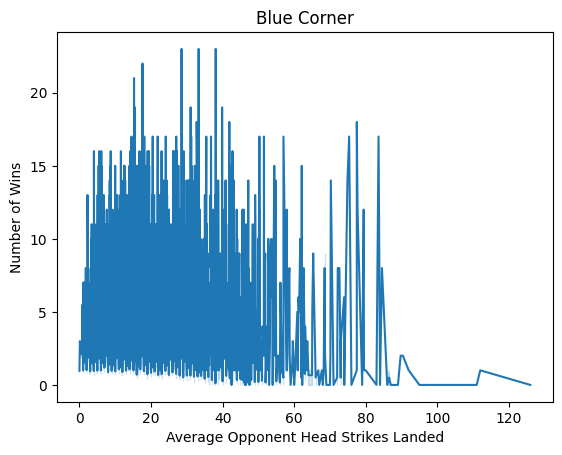

In [34]:
ax = sns.lineplot(data = data_raw, x = data_raw["B_avg_opp_HEAD_landed"], y=data_raw["B_wins"])

ax.set (
    title = 'Blue Corner',
    ylabel = "Number of Wins",
    xlabel = "Average Opponent Head Strikes Landed"
)

[Text(0.5, 1.0, 'Red Corner'),
 Text(0, 0.5, 'Number of Wins'),
 Text(0.5, 0, 'Average Opponent Head Strikes Landed')]

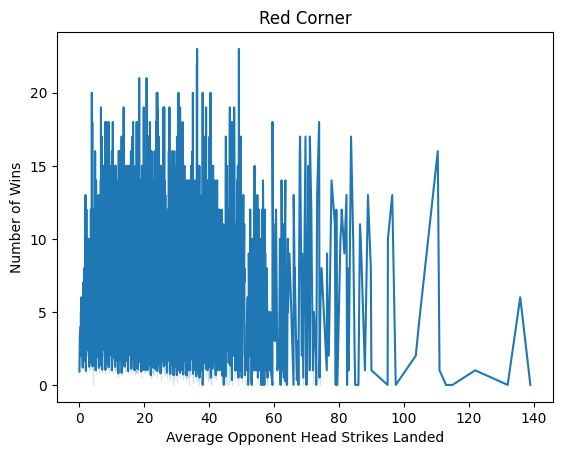

In [33]:
ax = sns.lineplot(data = data_raw, x = data_raw["R_avg_opp_HEAD_landed"], y=data_raw["R_wins"])

ax.set (
    title = 'Red Corner',
    ylabel = "Number of Wins",
    xlabel = "Average Opponent Head Strikes Landed"
)

I will continue my analsyis in step 4, but it's very interesting to see that so far, as each fighter takes more strikes to the head, the less wins they will secure. 

Let's produce a quick visualization for the second question using a histogram

In [49]:
'''
R_win_by_Decision_Majority
R_win_by_Decision_Split
R_win_by_Decision_Unanimous
R_win_by_KO/TKO
R_win_by_Submission
R_win_by_TKO_Doctor_Stoppage
'''

data = data_raw[["R_win_by_Decision_Majority", "R_win_by_Decision_Split", "R_win_by_Decision_Unanimous", 
                 "R_win_by_KO/TKO", "R_win_by_Submission", "R_win_by_TKO_Doctor_Stoppage"]] 

data


,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage
0,0,0,0,1,0,0
1,0,1,0,3,0,0
2,0,0,1,3,0,0
3,0,0,0,0,0,0
4,0,0,1,2,2,0
...,...,...,...,...,...,...
6007,0,0,0,0,0,0
6008,0,0,0,0,0,0
6009,0,0,0,0,0,0
6010,0,0,0,0,0,0
